In [2]:
import pandas as pd
import glob
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import sklearn
import seaborn as sns
from pandas.plotting import autocorrelation_plot
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [3]:
covid_df = pd.read_csv(r'/data/users/ahiremat/ML Project/COVID Data/rows_1.csv')
covid_df.reset_index()

,index,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
5,5,01/27/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
6,6,01/28/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
7,7,01/29/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
8,8,01/30/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
9,9,01/31/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


## Sorted by data and summed the numbers to get values for all of the USA instead of per state

In [4]:
covid_df = covid_df.groupby(['submission_date']).sum()
covid_df = covid_df[["tot_cases", "new_case", "tot_death", "new_death"]].reset_index()
covid_df["submission_date"] = pd.to_datetime(covid_df["submission_date"])
covid_df = covid_df.set_index("submission_date")
covid_df

,tot_cases,new_case,tot_death,new_death
submission_date,,,,
2020-01-22,1,1,0,0
2020-01-23,1,0,0,0
2020-01-24,2,1,0,0
2020-01-25,2,0,0,0
2020-01-26,5,3,0,0
2020-01-27,5,0,0,0
2020-01-28,5,0,0,0
2020-01-29,5,0,0,0
2020-01-30,5,0,0,0


In [9]:
sp_df = pd.read_csv(r'/data/users/ahiremat/ML Project/Stock Data/GSPC.csv')
sp_df["Date"] = pd.to_datetime(sp_df["Date"])
sp_df = sp_df.set_index("Date")
sp_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-12-13,3166.649902,3182.679932,3156.510010,3168.800049,3168.800049,3736870000
2019-12-16,3183.629883,3197.709961,3183.629883,3191.449951,3191.449951,4051790000
2019-12-17,3195.399902,3198.219971,3191.030029,3192.520020,3192.520020,3837540000
2019-12-18,3195.209961,3198.479980,3191.139893,3191.139893,3191.139893,4014080000
2019-12-19,3192.320068,3205.479980,3192.320068,3205.370117,3205.370117,3720450000
2019-12-20,3223.330078,3225.649902,3216.030029,3221.219971,3221.219971,6454270000
2019-12-23,3226.050049,3227.780029,3222.300049,3224.010010,3224.010010,3060610000
2019-12-24,3225.449951,3226.429932,3220.510010,3223.379883,3223.379883,1296540000
2019-12-26,3227.199951,3240.080078,3227.199951,3239.909912,3239.909912,2160680000


In [6]:
index = pd.date_range("2020-01-22","2020-11-15")
sp_df = sp_df.reindex(index)
sp_df = sp_df.fillna(method='pad')
sp_df

,Open,High,Low,Close,Adj Close,Volume
2020-01-22,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000,3.619850e+09
2020-01-23,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039,3.764860e+09
2020-01-24,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-25,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-26,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971,3.707130e+09
2020-01-27,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883,3.823100e+09
2020-01-28,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990,3.526720e+09
2020-01-29,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902,3.584500e+09
2020-01-30,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912,3.787250e+09
2020-01-31,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020,4.527830e+09


In [7]:
merged_df = covid_df.merge(sp_df, left_index = True, right_index = True )
merged_df = merged_df.drop(columns = ["Volume"])
merged_df

,tot_cases,new_case,tot_death,new_death,Open,High,Low,Close,Adj Close
2020-01-22,1,1,0,0,3330.020020,3337.770020,3320.040039,3321.750000,3321.750000
2020-01-23,1,0,0,0,3315.770020,3326.879883,3301.870117,3325.540039,3325.540039
2020-01-24,2,1,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-25,2,0,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-26,5,3,0,0,3333.100098,3333.179932,3281.530029,3295.469971,3295.469971
2020-01-27,5,0,0,0,3247.159912,3258.850098,3234.500000,3243.629883,3243.629883
2020-01-28,5,0,0,0,3255.350098,3285.780029,3253.219971,3276.239990,3276.239990
2020-01-29,5,0,0,0,3289.459961,3293.469971,3271.889893,3273.399902,3273.399902
2020-01-30,5,0,0,0,3256.449951,3285.909912,3242.800049,3283.659912,3283.659912
2020-01-31,7,2,0,0,3282.330078,3282.330078,3214.679932,3225.520020,3225.520020


# Pearson (R) Correlation Calculation

The Hypothesis is that we will see a negative correlation with COVID Cases and Deaths after the initial spike of cases. 

In [73]:
corr_df = merged_df.corr()
corr_df = corr_df[["Open", "High", "Low", "Close", "Adj Close"]]
corr_df

,Open,High,Low,Close,Adj Close
tot_cases,0.699355,0.703966,0.685353,0.693469,0.693469
new_case,0.468325,0.464145,0.463111,0.463895,0.463895
tot_death,0.681249,0.678210,0.669329,0.673039,0.673039
new_death,-0.124233,-0.150668,-0.111375,-0.129360,-0.129360
Open,1.000000,0.992680,0.993659,0.988588,0.988588
High,0.992680,1.000000,0.993950,0.994768,0.994768
Low,0.993659,0.993950,1.000000,0.994849,0.994849
Close,0.988588,0.994768,0.994849,1.000000,1.000000
Adj Close,0.988588,0.994768,0.994849,1.000000,1.000000
Volume,-0.665528,-0.644390,-0.683938,-0.668339,-0.668339


# Linear Regression to explore the correlation/relationship between COVID and S&P500

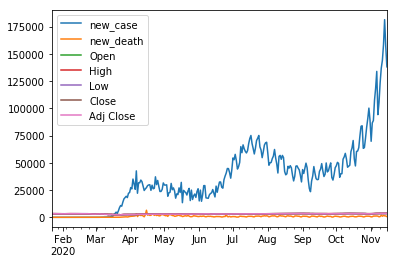

In [8]:
merged_df.drop(columns = ["tot_cases","tot_death"]).plot()